<a href="https://colab.research.google.com/github/itzdineshx/Internship_projects--DINESH-S-/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Prediction**

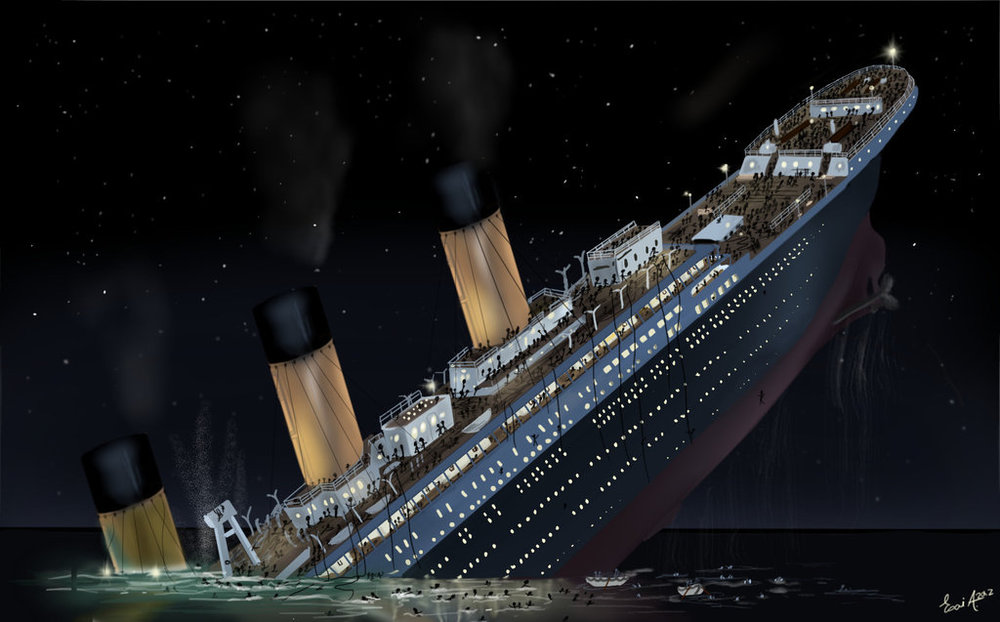

## **The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.
Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## **Evaluation**

It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

## **Overview of Data**
The data has been split into two groups:



*   training set (train.csv)
* test set (test.csv)


The training set should be used to build your machine learning models.

The test set should be used to see how well your model performs on unseen data.

use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data set Link: https://www.kaggle.com/c/titanic/data

**Extracting the downloaded data**

In [91]:
#extracting the data
from zipfile import ZipFile
file_name='/content/titanic.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('extracted Successfully!')#when printed done the extracion is done

extracted Successfully!


importing the neccessary libraries


In [92]:
import pandas as pd #for pre-processing data
import numpy as np #for numerical calculations


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer #for vectorization
from sklearn.model_selection import StratifiedShuffleSplit #for splitting train and test the data
from sklearn.base import BaseEstimator, TransformerMixin#for Transforming Data
from sklearn.impute import SimpleImputer #for imputing missing values
from sklearn.preprocessing import OneHotEncoder #for encoding
from sklearn.pipeline import Pipeline #for pipeline
from sklearn.preprocessing import StandardScaler #for scaling values
from sklearn.ensemble import RandomForestClassifier #for Random Forest Classifier
from sklearn.model_selection import GridSearchCV, cross_val_score #for cross validatio
from sklearn.metrics import accuracy_score #for accuracy

In [94]:
#data visulization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

Analyzing the Data set
**bold text**



In [95]:
titanic_data=pd.read_csv('/content/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variable Notes


*  pclass: A proxy for socio-economic status (SES)
1.   1st = Upper
2.   2nd = Middle
3.   3rd = Lower
*   age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
*  sibsp: The dataset defines family relations in this way...
*  Sibling: brother, sister, stepbrother, stepsister
*  Spouse = husband, wife (mistresses and fiancés were ignored)
*   parch: The dataset defines family relations in this way...
Parent = mother, father


In [96]:
titanic_data.shape

(891, 12)

In [97]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
#Analysing the statistical Features
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **Data Visualization**

In [100]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

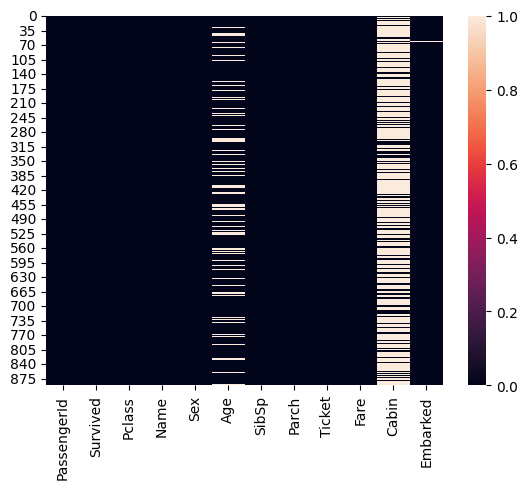

In [101]:
#visualizing the heatmap
sns.heatmap(titanic_data.isnull())

<Axes: >

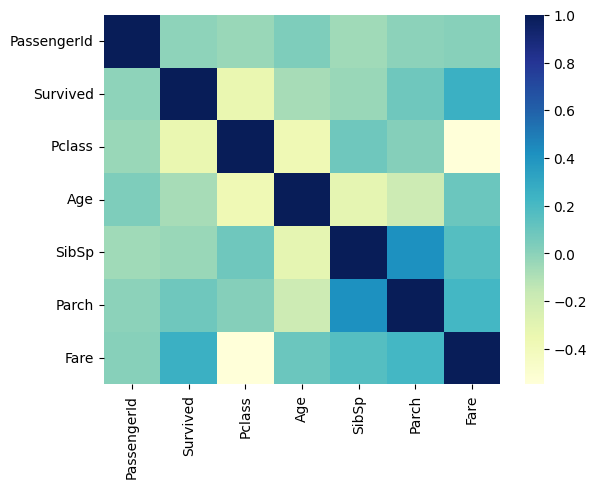

In [102]:
# Convert 'Survived' column to numeric type
titanic_data['Survived'] = pd.to_numeric(titanic_data['Survived'], errors='coerce')

# Drop non-numeric columns before calculating correlation
numeric_data = titanic_data.select_dtypes(include=np.number)

#visualizing the coerralation
sns.heatmap(numeric_data.corr(),cmap="YlGnBu")

In [103]:
#spltting the data into train and test data
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split_data.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_index]
    strat_test_set = titanic_data.loc[test_index]

In [104]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [105]:
strat_test_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


<Axes: >

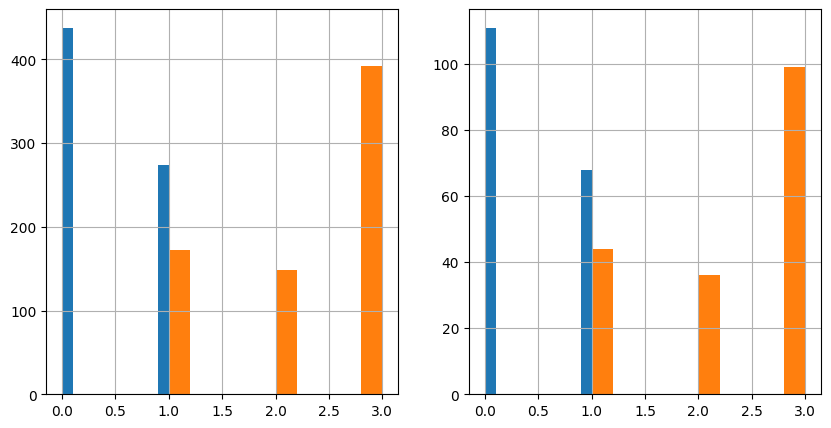

In [106]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

<Axes: xlabel='Survived', ylabel='count'>

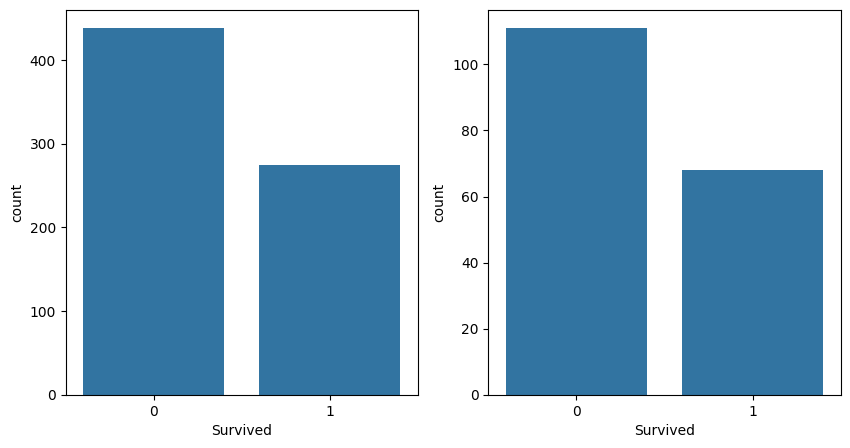

In [107]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Survived',data=strat_train_set)
plt.subplot(1,2,2)
sns.countplot(x='Survived',data=strat_test_set)


## **Data Cleaning**

Handling missing values in the Age column of a dataset.

In [184]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputr = SimpleImputer(strategy='mean')
        X['Age'] = imputr.fit_transform(X[['Age']])
        return X

Encoding categorical features into a one-hot numeric array.

In [185]:
class DropFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.drop(['Embarked', 'Name', 'Ticket', 'Sex', 'Cabin', 'N'], axis=1, errors='ignore')
        return X

In [276]:
class FareImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        fare_imputer = SimpleImputer(strategy='mean')
        X['Fare'] = fare_imputer.fit_transform(X[['Fare']])
        return X

In [186]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        enoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

        # Check if 'Embarked' columns are already present
        embarked_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_N']
        if not any(col in X.columns for col in embarked_columns):
            if 'Embarked' in X.columns:
                X_embarked_encoded = enoder.fit_transform(X[['Embarked']])
                embarked_column_names = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
                if X_embarked_encoded.shape[1] == 4:
                    embarked_column_names.append('Embarked_N')
                X_embarked_df = pd.DataFrame(X_embarked_encoded, columns=embarked_column_names)
                X_embarked_df.index = X.index
                X = pd.concat([X, X_embarked_df], axis=1)

        # Check if 'Sex' columns are already present
        sex_columns = ['Sex_Female', 'Sex_Male']
        if not any(col in X.columns for col in sex_columns):
            if 'Sex' in X.columns:
                X_sex_encoded = enoder.fit_transform(X[['Sex']])
                sex_column_names = ['Sex_Female', 'Sex_Male']
                X_sex_df = pd.DataFrame(X_sex_encoded, columns=sex_column_names)
                X_sex_df.index = X.index
                X = pd.concat([X, X_sex_df], axis=1)

        # Drop the original 'Embarked' and 'Sex' columns if they exist
        X = X.drop(columns=['Embarked', 'Sex'], errors='ignore')

        return X

 Creating pipeline for data preprocessing

In [277]:
# Add the FareImputer to your pipeline
titanic_pipeline = Pipeline([
    ('age_imputer', AgeImputer()),
    ('fare_imputer', FareImputer()),  # This handles missing values in 'Fare'
    ('embarked_encoder', FeatureEncoder()),
    ('drop_features', DropFeatures())
])

In [278]:
# Apply the pipeline to the training set
strat_train_set_processed = titanic_pipeline.fit_transform(strat_train_set)

# Apply the pipeline to the testing set
strat_test_set_processed = titanic_pipeline.transform(strat_test_set)

In [279]:
strat_train_set_processed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_N,Sex_Female,Sex_Male
750,751,1,2,4.000000,1,1,23.0000,0.0,0.0,1.0,0.0,1.0,0.0
527,528,0,1,29.726119,0,0,221.7792,0.0,0.0,1.0,0.0,0.0,1.0
556,557,1,1,48.000000,1,0,39.6000,1.0,0.0,0.0,0.0,1.0,0.0
857,858,1,1,51.000000,0,0,26.5500,0.0,0.0,1.0,0.0,0.0,1.0
15,16,1,2,55.000000,0,0,16.0000,0.0,0.0,1.0,0.0,1.0,0.0


In [280]:
strat_test_set_processed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_N,Sex_Female,Sex_Male
419,420,0,3,10.0,0,2,24.1500,0.0,0.0,1.0,0.0,1.0,0.0
823,824,1,3,27.0,0,1,12.4750,0.0,0.0,1.0,0.0,1.0,0.0
526,527,1,2,50.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0,0.0
175,176,0,3,18.0,1,1,7.8542,0.0,0.0,1.0,0.0,0.0,1.0
875,876,1,3,15.0,0,0,7.2250,1.0,0.0,0.0,0.0,1.0,0.0


## **Data Pre-Processing & Visualization**

In [281]:
scaler = StandardScaler()

X=strat_train_set_processed.drop('Survived', axis=1)
y=strat_train_set_processed['Survived']

X_train = scaler.fit_transform(X)
X_test = scaler.transform(X)
y_train = strat_train_set_processed['Survived']

<Figure size 1500x600 with 0 Axes>

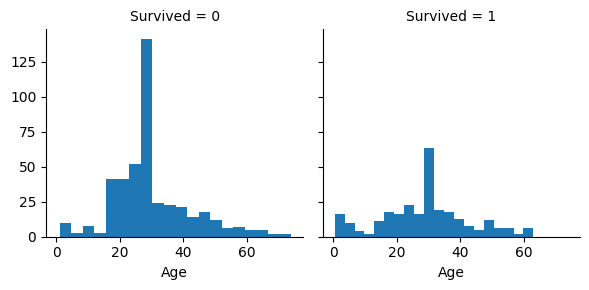

In [331]:
plt.figure(figsize = (15,6))
g = sns.FacetGrid(strat_train_set, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

<Axes: xlabel='Pclass', ylabel='Survived'>

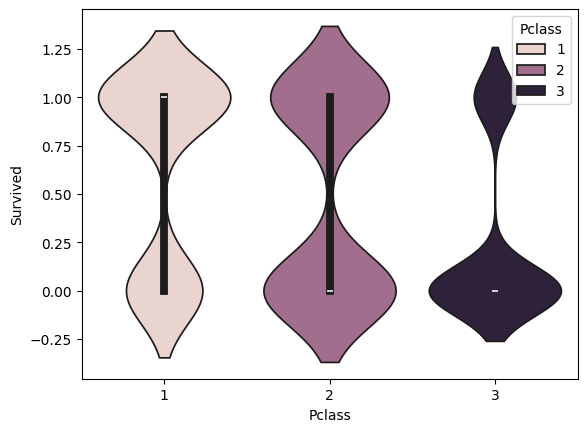

In [336]:

sns.violinplot(data = strat_train_set, x = 'Pclass', y = 'Survived', hue = 'Pclass')

<Axes: xlabel='Embarked', ylabel='Pclass'>

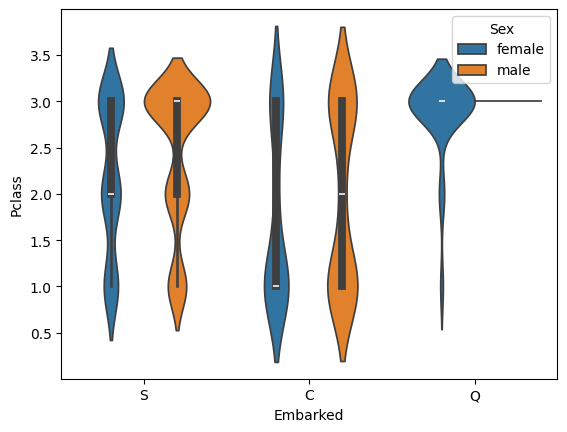

In [333]:
sns.violinplot(x = 'Embarked', y = 'Pclass', data = strat_train_set, hue = 'Sex')


# **Model Selection**

### **Random Forest Classifier**

Train the model

In [282]:
clf = RandomForestClassifier()
param_grid = [{
    'n_estimators': [10, 100,200, 500],
    'max_depth': [None,5,10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}]


In [283]:
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [291]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [292]:
final_clf = grid_search.best_estimator_

In [293]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=500)

In [294]:
strat_test_set = titanic_pipeline.fit_transform(strat_test_set)

strat_test_set_processed = strat_test_set.drop('Survived', axis=1)
y_test = strat_test_set['Survived']

In [295]:
scaler = StandardScaler()
X_test = scaler.fit_transform(strat_test_set_processed)
Y_test = strat_test_set['Survived']

In [296]:
final_scores = cross_val_score(final_clf, X_test, Y_test, cv=3, scoring='accuracy')
final_scores.mean()

0.8103578154425612

In [297]:
final_data = titanic_pipeline.fit_transform(strat_test_set)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_N,Sex_Female,Sex_Male
419,420,0,3,10.0,0,2,24.1500,0.0,0.0,1.0,0.0,1.0,0.0
823,824,1,3,27.0,0,1,12.4750,0.0,0.0,1.0,0.0,1.0,0.0
526,527,1,2,50.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0,0.0
175,176,0,3,18.0,1,1,7.8542,0.0,0.0,1.0,0.0,0.0,1.0
875,876,1,3,15.0,0,0,7.2250,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,679,0,3,43.0,1,6,46.9000,0.0,0.0,1.0,0.0,1.0,0.0
640,641,0,3,20.0,0,0,7.8542,0.0,0.0,1.0,0.0,0.0,1.0
782,783,0,1,29.0,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,1.0
852,853,0,3,9.0,1,1,15.2458,1.0,0.0,0.0,0.0,1.0,0.0


In [298]:
X_final = final_data.drop('Survived', axis=1)
y_final= final_data['Survived']

In [299]:
scaler = StandardScaler()
X_final_data = scaler.fit_transform(X_final_data)
Y_final_data = final_data['Survived']

In [300]:
prod_clf = RandomForestClassifier()
param_grid = [{
    'n_estimators': [10, 100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_final_data, Y_final_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [302]:
final_clf = grid_search.best_estimator_

In [303]:
final_clf

RandomForestClassifier(min_samples_leaf=2, min_samples_split=3, n_estimators=10)

### **Testing the data**

In [304]:
titanic_data=pd.read_csv('/content/test.csv')
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [308]:
final_test_data = titanic_pipeline.fit_transform(titanic_data)
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_Female,Sex_Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [309]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked_C   418 non-null    float64
 7   Embarked_Q   418 non-null    float64
 8   Embarked_S   418 non-null    float64
 9   Sex_Female   418 non-null    float64
 10  Sex_Male     418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


Filling the missing values

In [310]:
print("Training data shape:", X_final_data.shape)
print("Test data shape:", final_test_data.shape)


Training data shape: (179, 12)
Test data shape: (418, 11)


In [314]:
X_final_data = pd.DataFrame(X_final_data, columns=feature_names)
X_final_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_N,Sex_Female,Sex_Male
0,-0.094357,0.825347,-1.456993,-0.460762,1.858226,-0.151624,-0.466569,-0.393496,0.683530,-0.074953,1.340476,-1.340476
1,1.375915,0.825347,-0.192652,-0.460762,0.682882,-0.488541,-0.466569,-0.393496,0.683530,-0.074953,1.340476,-1.340476
2,0.295047,-0.366081,1.517926,-0.460762,-0.492463,-0.545536,-0.466569,-0.393496,0.683530,-0.074953,1.340476,-1.340476
3,-0.982343,0.825347,-0.862009,0.398367,0.682882,-0.621888,-0.466569,-0.393496,0.683530,-0.074953,-0.746004,0.746004
4,1.565158,0.825347,-1.085128,-0.460762,-0.492463,-0.640045,2.143304,-0.393496,-1.462994,-0.074953,1.340476,-1.340476
...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.848218,0.825347,0.997315,0.398367,6.559605,0.504894,-0.466569,-0.393496,0.683530,-0.074953,1.340476,-1.340476
175,0.709925,0.825347,-0.713263,-0.460762,-0.492463,-0.621888,-0.466569,-0.393496,0.683530,-0.074953,-0.746004,0.746004
176,1.226704,-1.557510,-0.043906,-0.460762,-0.492463,0.017195,-0.466569,-0.393496,0.683530,-0.074953,-0.746004,0.746004
177,1.481454,0.825347,-1.531366,0.398367,0.682882,-0.408582,2.143304,-0.393496,-1.462994,-0.074953,1.340476,-1.340476


### **Training the Model**

In [315]:
prod_clf.fit(X_train, y_train)

predictions = prod_clf.predict(X_final_data)

print(predictions)

[0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# **Evaluation**

In [324]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(prod_clf, X_final_data, Y_final_data, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# You can also calculate cross-validation for precision, recall, or f1
cv_f1_scores = cross_val_score(prod_clf, X_final_data, Y_final_data, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_f1_scores)
print("Mean CV F1 score:", cv_f1_scores.mean())


Cross-Validation Accuracy Scores: [0.77777778 0.72222222 0.83333333 0.72222222 0.88571429]
Mean CV score: 0.7882539682539683
Cross-Validation F1 Scores: [0.64       0.58333333 0.69565217 0.52173913 0.84615385]
Mean CV F1 score: 0.6573756967670011


<ipython-input-349-3f81c992640c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(strat_train_set[strat_train_set['Sex'] == 'male'][strat_train_set['Survived'] == 1]['Age'], bins=20, kde=True)
<ipython-input-349-3f81c992640c>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(strat_train_set[strat_train_set['Sex'] == 'female'][strat_train_set['Survived'] == 1]['Age'], bins=20, kde=True)


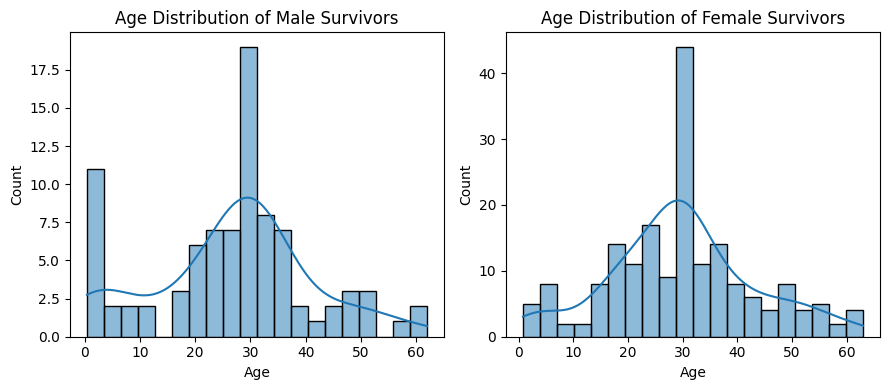

In [349]:
# Create a subplot for the age distribution
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize = (9, 4))

# Plot the age distribution of male survivors
plt.subplot(1, 2, 1)
sns.histplot(strat_train_set[strat_train_set['Sex'] == 'male'][strat_train_set['Survived'] == 1]['Age'], bins=20, kde=True)

plt.title('Age Distribution of Male Survivors')

# Plot the age distribution of female survivors
plt.subplot(1, 2, 2)
sns.histplot(strat_train_set[strat_train_set['Sex'] == 'female'][strat_train_set['Survived'] == 1]['Age'], bins=20, kde=True)
plt.title('Age Distribution of Female Survivors')

plt.tight_layout()
plt.show()


In [ ]:
survived_counts = final_df['Survived'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
_ = plt.title('Survival Rate')


In [355]:
final_df=pd.DataFrame(predictions,columns=['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv('predictions.csv',index=False)
final_df

,PassengerId,Survived
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
174,0,0
175,0,0
176,0,0
177,1,1


### Cross-Validation Accuracy:
The accuracy scores across the different folds range from ~0.72 to ~0.89, with a mean cross-validation accuracy score of 0.788.

This shows that the model's performance is fairly consistent, with some variations between different data splits, but generally good performance around 78-79%.
### Cross-Validation F1 Scores:
The F1 scores range from 0.52 to 0.85, with a mean F1 score of 0.657.

The F1 score, which balances precision and recall, shows more variability across the folds, indicating that while accuracy is high, the model may struggle a bit with imbalanced data or misclassifying one of the classes more frequently.

### Analysis:
The higher accuracy but moderate F1 scores suggest that while the model correctly predicts a large portion of cases, it may still misclassify certain instances, especially in one class (likely the minority class).

This could be due to class imbalance, where the model finds it easier to predict the majority class correctly, leading to slightly lower F1 scores.

# **Summary**

In the actual **Titanic disaster**, there were a total of 2,224 passengers and crew aboard, and the survival statistics were as follows:

- **Total survivors**: 710 people
- **Total deaths**: 1,514 people

### Survival and Death Rates:

1. **Survival Rate**:
    **31.93%** of the people on board survived the Titanic disaster.

2. **Death Rate**:
   **68.07%** of the people on board died in the incident.

### Summary:
- **Survival Rate**: ~32%
- **Death Rate**: ~68%

This means that about two-thirds of the passengers and crew lost their lives in the Titanic disaster.

# **My prediction**

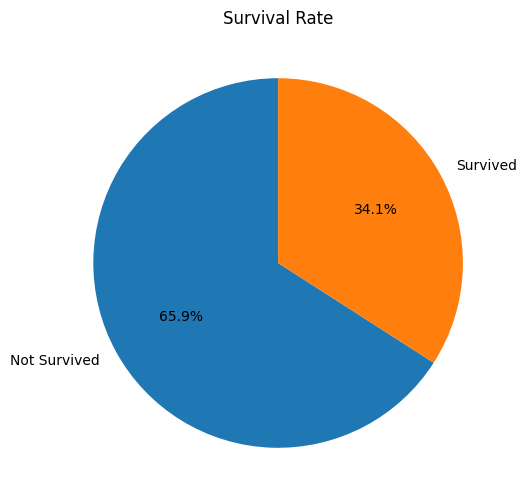

The pie chart you have shared shows the Titanic survival rate, where:

- **34.1%** of passengers survived.
- **65.9%** of passengers did not survive.

### Conclusion:
A significant majority of passengers (around two-thirds) did not survive the Titanic disaster, with only about one-third managing to survive. This high fatality rate highlights the severity of the disaster and possibly indicates the limitations of the safety measures at that time, such as insufficient lifeboats or lack of preparedness. The disparity could also suggest socio-economic factors, where survival rates might have differed across passenger classes.